In [1]:
import stlearn as st
import os
import pandas as pd
from pathlib import Path
import scanpy as sc
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image 
from typing import Optional, Union
from anndata import AnnData

/90days/s4596423/envs/stlearn/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [16]:
print(st.__version__)
print(pd.__version__)

0.2.4
1.0.5


In [17]:
# data = st.read.file_10x_h5("filtered_feature_bc_matrix.h5")
# data.var_names_make_unique()
path = '/QRISdata/Q1851/Minh/Spatial_transcriptomic/C1_refined/'
data = st.read.file_10x_mtx(os.path.join(path, "filtered_feature_bc_matrix"))
data.var_names_make_unique()

In [18]:
st.add.image(adata=data, imgpath=path + "spatial/tissue_hires_image.png", library_id='whatever')

Added tissue image to the object!


In [19]:
st.add.positions(data,position_filepath =path +  "spatial/tissue_positions_list.csv",
                scale_filepath = path + "spatial/scalefactors_json.json",
                quality="high")

In [20]:
tissues = pd.read_csv('/QRISdata/Q1851/Minh/RNAScope/SkinSpatial/Tissue2_only.csv', sep=',', index_col = 0)
data.obs['tissue'] = tissues.Tissue2 # if your object is called "data"
data_subset = data[data.obs['tissue'] == 'Tissue2']

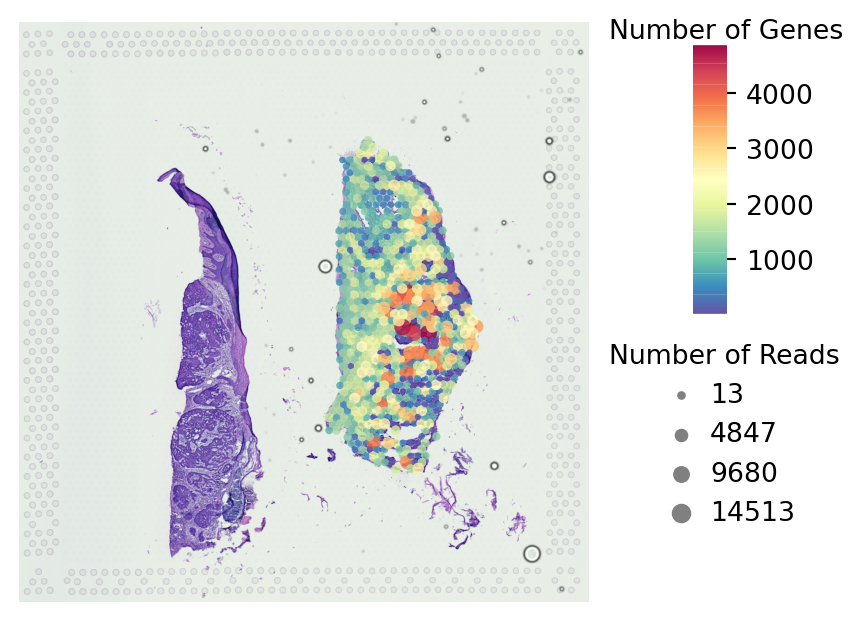

In [21]:
st.pl.QC_plot(data_subset)

Barcode
AAACAAGTATCTCCCA-1    Tissue2
AAACAGTGTTCCTGGG-1        NaN
AAACATTTCCCGGATT-1    Tissue2
AAACCGTTCGTCCAGG-1        NaN
AAACGAGACGGTTGAT-1    Tissue2
                       ...   
TTGTGGTGGTACTAAG-1    Tissue2
TTGTTGTGTGTCAAGA-1    Tissue2
TTGTTTCACATCCAGG-1        NaN
TTGTTTCATTAGTCTA-1        NaN
TTGTTTGTATTACACG-1        NaN
Name: Tissue2, Length: 1179, dtype: object

In [10]:
data

AnnData object with n_obs × n_vars = 1179 × 33538 
    obs: 'imagerow', 'imagecol', 'tissue'
    var: 'gene_ids', 'feature_types'
    uns: 'spatial'

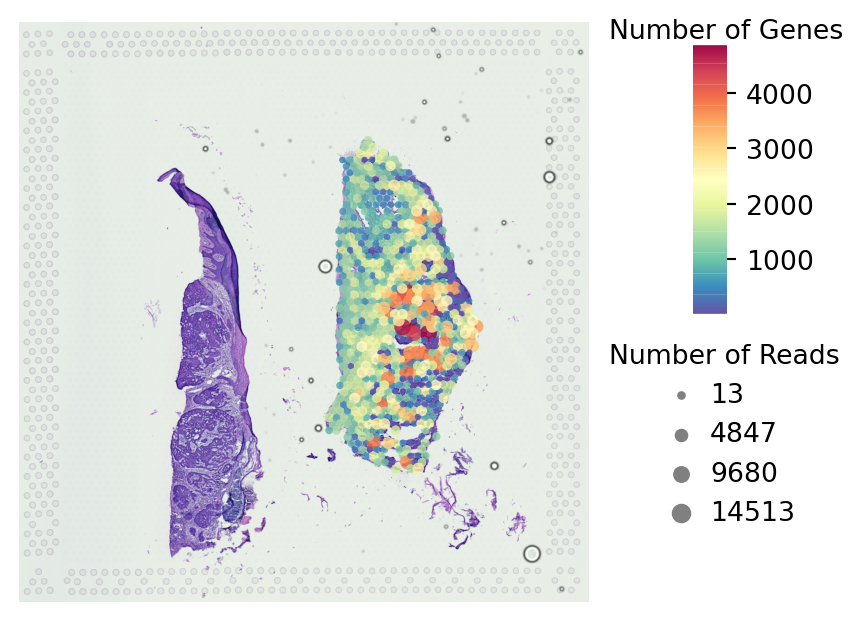

In [30]:
#perform this before normalisation 
st.pl.QC_plot(data_subset)

In [22]:
st.pp.filter_genes(data_subset,min_cells=3)

Trying to set attribute `.var` of view, copying.


In [15]:
ST_LABEL = 'predict_assay_subset_rmfibroblast_2.csv'

label_df = pd.read_csv(ST_LABEL, index_col=0)
# label_df_ = label_df.T[data.obs_names]
label_df.head()

AAACAAGTATCTCCCA-1  AAACAGTGTTCCTGGG-1  \
T cells                          0.035814            0.024683   
macrophages/dendritic            0.257627            0.243260   
pericytes                        0.342138            0.316136   
epidermal stem cell              0.069735            0.051200   
vascular endothelial             0.000000            0.231881   

                       AAACATTTCCCGGATT-1  AAACCGTTCGTCCAGG-1  \
T cells                          0.085743            0.145462   
macrophages/dendritic            0.259431            0.090012   
pericytes                        0.099209            0.072327   
epidermal stem cell              0.258701            0.236790   
vascular endothelial             0.016428            0.154429   

                       AAACGAGACGGTTGAT-1  AAAGTGTGATTTATCT-1  \
T cells                          0.909341            0.033954   
macrophages/dendritic            0.027789            0.413388   
pericytes                        0.016156            0.057825   
epidermal stem cell              0.034395            0.070385   
vascular endothelial             0.000294            0.336872   

                       AAAGTTGACTCCCGTA-1  AAATAGCTTAGACTTT-1  \
T cells                          0.653707            0.197027   
macrophages/dendritic            0.113038            0.020129   
pericytes                        0.055600            0.000603   
epidermal stem cell              0.013064            0.094709   
vascular endothelial             0.058039            0.056352   

                       AAATAGGGTGCTATTG-1  AAATCTAGCCCTGCTA-1  ...  \
T cells                          0.125689            0.030901  ...   
macrophages/dendritic            0.070369            0.229749  ...   
pericytes                        0.453649            0.149359  ...   
epidermal stem cell              0.202278            0.206160  ...   
vascular endothelial             0.015744            0.027757  ...   

                       TTGGCTCGCATGAGAC-1  TTGGGCGGCGGTTGCC-1  \
T cells                          0.026987            0.056063   
macrophages/dendritic            0.515003            0.175569   
pericytes                        0.196906            0.436608   
epidermal stem cell              0.000000            0.090525   
vascular endothelial             0.044652            0.008058   

                       TTGGTCACACTCGTAA-1  TTGTAAGGACCTAAGT-1  \
T cells                          0.000000            0.204508   
macrophages/dendritic            0.000000            0.197156   
pericytes                        0.000000            0.002315   
epidermal stem cell              0.021876            0.176349   
vascular endothelial             0.002455            0.031026   

                       TTGTAAGGCCAGTTGG-1  TTGTGGTGGTACTAAG-1  \
T cells                          0.159526            0.197034   
macrophages/dendritic            0.071511            0.145705   
pericytes                        0.126636            0.079751   
epidermal stem cell              0.141562            0.226961   
vascular endothelial             0.036722            0.083351   

                       TTGTTGTGTGTCAAGA-1  TTGTTTCACATCCAGG-1  \
T cells                          0.180417            0.032011   
macrophages/dendritic            0.250402            0.310511   
pericytes                        0.062150            0.035798   
epidermal stem cell              0.426859            0.107582   
vascular endothelial             0.012532            0.371170   

                       TTGTTTCATTAGTCTA-1  TTGTTTGTATTACACG-1  
T cells                          0.146104            0.025344  
macrophages/dendritic            0.136399            0.084202  
pericytes                        0.076982            0.250414  
epidermal stem cell              0.437857            0.045128  
vascular endothelial             0.088826            0.119875  

[5 rows x 1179 columns]

In [16]:
label_df_Transfer = label_df[data_subset.obs_names]

In [ ]:
# label_df_Transfer.transpose().iloc[:, 0:-1]

In [25]:
def draw_pie(dist,
             xpos,
             ypos,
             size,
             cmap,
             ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))

    # for incremental pie slices
    cumsum = np.cumsum(dist)
    cumsum = cumsum / cumsum[-1]
    pie = [0] + cumsum.tolist()

    for i, (r1, r2) in enumerate(zip(pie[:-1], pie[1:])):
        angles = np.linspace(2 * np.pi * r1, 2 * np.pi * r2)
        x = [0] + np.cos(angles).tolist()
        y = [0] + np.sin(angles).tolist()

        xy = np.column_stack([x, y])

        ax.scatter([xpos], [ypos], marker=xy, s=size, c=[cmap(int(i + 1) / 19)])

    return ax


def label_plot(
        adata: AnnData,
        name: str = None,
        method: str = None,
        tissue_alpha: float = 1.0,
        cmap: str = "vega_20_scanpy",
        show_legend: bool = True,
        show_axis: bool = False,
        dpi: int = 300,
        output: str = None,
        ues_data: str = "label",
        copy: bool = False,
        x_min: Union[float, int] = None, x_max: Union[float, int] = None, add_x: Union[float, int] = None,
        y_min: Union[float, int] = None, y_max: Union[float, int] = None, add_y: Union[float, int] = None,
) -> Optional[AnnData]:
#     from stlearn.external.scanpy.plotting import palettes
    from scanpy.plotting import palettes
    if cmap == "vega_10_scanpy":
        cmap = palettes.vega_10_scanpy
    elif cmap == "vega_20_scanpy":
        cmap = palettes.vega_20_scanpy
    elif cmap == "default_102":
        cmap = palettes.default_102
    elif cmap == "default_28":
        cmap = palettes.default_28
    else:
        raise ValueError(
            "We only support vega_10_scanpy, vega_20_scanpy, default_28, default_102")

    cmaps = matplotlib.colors.LinearSegmentedColormap.from_list("", cmap)

    cmap_ = plt.cm.get_cmap(cmaps)

    labels_df = adata.obsm[ues_data]

    plt.rcParams['figure.dpi'] = dpi

    # Option for turning off showing figure
    plt.ioff()

    # Initialize matplotlib
    fig, a = plt.subplots()

    for index, row in labels_df.iterrows():
        draw_pie(row, adata.obs["imagecol"][index], adata.obs["imagerow"][index], 6, cmap_, ax=a)

    plt.xlim([x_min - add_x, x_max + add_x])
    plt.ylim([y_max + add_y, y_min - add_y])

    if show_legend:
        from matplotlib.patches import Patch
        legend_elements = [Patch(color=cmap_(int(i + 1) / 19), label=j) for i, j in enumerate(labels_df.columns.values)]
        a.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.5), prop=dict(size=7))
#         a.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.2), prop=dict(size=7))
    if not show_axis:
        a.axis('off')

    # Overlay the tissue image
    a.imshow(adata.uns["tissue"], alpha=tissue_alpha, zorder=-1, )

    if name is None:
        name = method
    if output is not None:
        fig.savefig(output + "/" + name + ".pdf", dpi=dpi, bbox_inches='tight', pad_inches=0)

    plt.show()

In [26]:

def global_label_plot(adata, ues_data="label",
                     output=None, name=None, dpi=500):
    x_min, x_max = adata.obs["imagecol"].min(), adata.obs["imagecol"].max()
    y_min, y_max = adata.obs["imagerow"].min(), adata.obs["imagerow"].max()
    add_x = (x_max - x_min)//20
    add_y = (y_max - y_min)//20

    label_plot(adata, ues_data=ues_data, output=output, name=name, 
               x_min=x_min, x_max=x_max, add_x=add_x, 
               y_min=y_min, y_max=y_max, add_y=add_y, dpi=dpi)

AnnData object with n_obs × n_vars = 676 × 33538 
    obs: 'imagerow', 'imagecol', 'tissue'
    var: 'gene_ids', 'feature_types'
    uns: 'spatial'
    obsm: 'label'

In [49]:
data_subset.obsm["label"] = label_df_Transfer.transpose().iloc[:, 0:-1]

# global_label_plot(data_subset, output='/QRISdata/Q1851/Minh/RNAScope/SkinSpatial',name='scater_plot_label_transfer', dpi=575)

In [22]:
def coloc_lot_filter(adata, cell_tpyes, threshold_filter_low=0.0, 
                     threshold_filter_high=1.0, threshold_select=0.0,
                     output=None, name=None):
    x_min, x_max = adata.obs["imagecol"].min(), adata.obs["imagecol"].max()
    y_min, y_max = adata.obs["imagerow"].min(), adata.obs["imagerow"].max()
    add_x = (x_max - x_min)//20
    add_y = (y_max - y_min)//20
    df = adata.obsm["label"]
    df_coloc = df.loc[:, cell_tpyes]
    for i in cell_tpyes:
        df_coloc = df_coloc.query('`{0}` > @threshold_filter_low & `{0}` < @threshold_filter_high'.format(i))
    
    df_coloc = df_coloc[df_coloc.sum(axis=1) > threshold_select]
    df_coloc = df_coloc.div(df_coloc.sum(axis=1), axis=0)
    data_coloc = adata[df_coloc.index,:]
    data_coloc.obsm["coloc"] = df_coloc
    label_plot(data_coloc, ues_data="coloc", output=output, name=name, 
               x_min=x_min, x_max=x_max, add_x=add_x, 
               y_min=y_min, y_max=y_max, add_y=add_y)

In [23]:
coloc_lot_filter(data_subset, ["differentiated keratinocytes", "T cells"], 
                 threshold_filter_low=0.05, threshold_filter_high=0.9, threshold_select=0.5,
                 output='/QRISdata/Q1851/Minh/RNAScope/SkinSpatial',name='scater_plot_keratinocytes_vs_Tcells')

KeyError: 'tissue_img'

In [ ]:
# coloc_lot_filter(data_subset, ['macrophages/dendritic',
#                                             'vascular endothelial', 'epidermal stem cell',
#                                             'differentiated keratinocytes', 'T cells', 'pericytes',
#                                             'erythrocytes', 'lymphatic endothelial cells', 'melanocytes'], 
#                  threshold_filter_low=0.0, threshold_filter_high=1, threshold_select=0,output='/QRISdata/Q1851/Minh/RNAScope/SkinSpatial',name='scater_plot_subset2')

In [ ]:
def coloc_plot(
        adata: AnnData,
        name: str = None,
        title: str = None,
        method: str = None,
        cmap: str = "Spectral_r",
        tissue_alpha: float = 0.75,
        spot_size: Union[float, int] = 40,
        show_color_bar: bool = True,
        show_axis: bool = False,
        dpi: int = 300,
        output: str = None,
        x_min: Union[float, int] = None, x_max: Union[float, int] = None, add_x: Union[float, int] = None,
        y_min: Union[float, int] = None, y_max: Union[float, int] = None, add_y: Union[float, int] = None,
) -> Optional[AnnData]:
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0.5, 1))
    alpha_scale = scaler.fit_transform(data.obs["coloc"].to_numpy().reshape(-1, 1))

    plt.rcParams['figure.dpi'] = dpi

    # Option for turning off showing figure
    plt.ioff()

    # Initialize matplotlib
    fig, a = plt.subplots()

    vmin = 0.0
    vmax = 1.0
    # Plot scatter plot based on pixel of spots
    for i, (index, row) in enumerate(data.obs.iterrows()):
        plot = a.scatter(row["imagecol"], row["imagerow"], edgecolor="none", alpha=alpha_scale[i][0], marker="o",
                         vmin=vmin, vmax=vmax, cmap=plt.get_cmap(cmap), c=row["coloc"], s=spot_size)

    plt.xlim([x_min - add_x, x_max + add_x])
    plt.ylim([y_max + add_y, y_min - add_y])

    if show_color_bar:
        print('Color bar', show_color_bar)
        cb = plt.colorbar(plot, cax=fig.add_axes([0.85, 0.5, 0.05, 0.35]), cmap=cmap)
        cb.ax.set_xlabel(title, fontsize=8)
        cb.ax.xaxis.set_label_coords(0.98, 1.10)
        cb.outline.set_visible(False)

    if not show_axis:
        a.axis('off')

    # Overlay the tissue image
    a.imshow(adata.uns["tissue_img"], alpha=tissue_alpha, zorder=-1, )

    # fig.tight_layout()
    if name is None:
        name = method
    if output is not None:
        fig.savefig(output + "/" + name + ".pdf", dpi=dpi, bbox_inches='tight', pad_inches=0)
    
    plt.show()
#     plt.colorbar(orientation='horizontal')

def coloc_lot_heatmap(adata, cell_tpyes, threshold_filter_low=0.1, spot_size = 30, 
                     threshold_filter_high=0.8, threshold_select=0.5,
                     output=None, name=None, title = None):
    x_min, x_max = adata.obs["imagecol"].min(), adata.obs["imagecol"].max()
    y_min, y_max = adata.obs["imagerow"].min(), adata.obs["imagerow"].max()
    add_x = (x_max - x_min)//20
    add_y = (y_max - y_min)//20
    df = adata.obsm["label"]
    df_coloc = df.loc[:, cell_tpyes]
    for i in cell_tpyes:
        df_coloc = df_coloc.query('`{0}` > @threshold_filter_low & `{0}` < @threshold_filter_high'.format(i))
    
    df_coloc = df_coloc[df_coloc.sum(axis=1) > threshold_select]
    df_coloc_all = df.loc[:, cell_tpyes]
    df_coloc_all[cell_tpyes] = 0
    df_coloc_all.loc[df_coloc.index, :] = df_coloc
    data.obs["coloc"] = df_coloc_all.sum(axis=1)
    if name and output:
        name = "heatmap_"+name
    
    coloc_plot(data, spot_size=spot_size, name=name, output=output, cmap="viridis", title = title, 
               show_color_bar = True,
               x_min=x_min, x_max=x_max, add_x=add_x, 
               y_min=y_min, y_max=y_max, add_y=add_y)

Color bar True


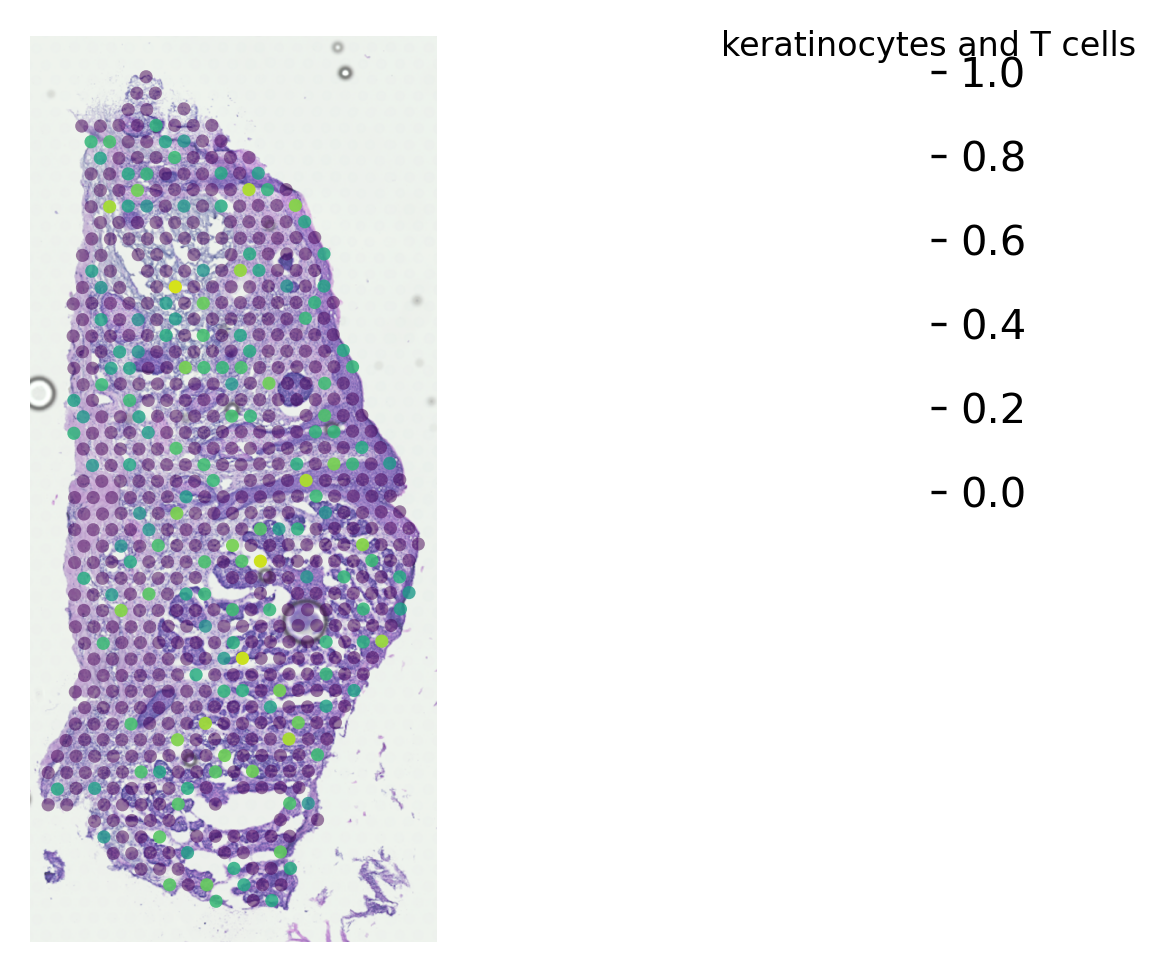

In [20]:

coloc_lot_heatmap(data_subset, ["differentiated keratinocytes", "T cells",'epidermal stem cell'], spot_size= 10,
                 threshold_filter_low=0.05, threshold_filter_high=0.9, threshold_select=0.5,
                 title = "keratinocytes and T cells",output='/QRISdata/Q1851/Minh/RNAScope/SkinSpatial',name='scater_plot_heatmap_kera_Tcell')

In [23]:
st.em.run_pca(data_subset,n_comps=50)

PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']


In [24]:
st.pp.neighbors(data_subset,n_neighbors=15)

Created k-Nearest-Neighbor graph in adata.uns['neighbors'] 


In [25]:
st.em.run_umap(data_subset)

UMAP is done! Generated in adata.obsm['X_umap'] nad adata.uns['umap']


In [26]:
st.spatial.smooth.disk(data_subset,rates=2,method="median",use_data="X_umap")

Disk smoothing function is applied! The new data are stored in adata.obsm["X_diffmap_disk"]


In [27]:
%matplotlib inline
st.tl.clustering.kmeans(data_subset,n_clusters=3,use_data="X_umap_disk")

Applying Kmeans clustering ...
Kmeans clustering is done! The labels are stored in adata.obs["kmeans"]


In [28]:
??st.pl.cluster_plot

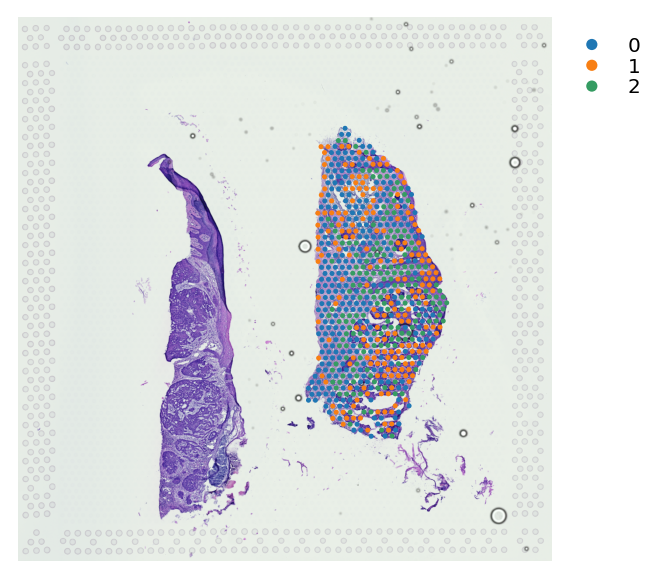

In [29]:
st.pl.cluster_plot(data_subset,use_label="kmeans",data_alpha=1, 
                   spot_size=4, name="k_mean_stLearn_2", output="./")

In [30]:
st.pp.neighbors(data_subset,n_neighbors=20,use_rep='X_umap_disk')


Created k-Nearest-Neighbor graph in adata.uns['neighbors'] 


In [35]:
st.tl.clustering.louvain(data_subset, resolution=0.09)

Applying Louvain clustering ...
Louvain clustering is done! The labels are stored in adata.obs['louvain']


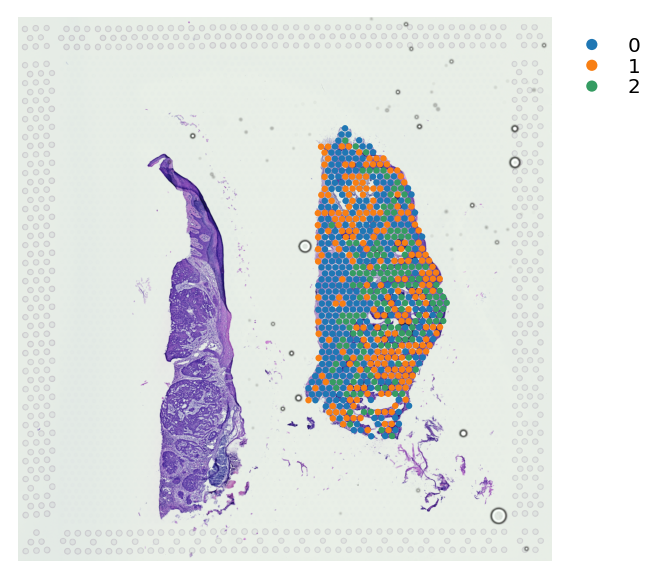

In [36]:
st.pl.cluster_plot(data_subset,use_label="louvain")

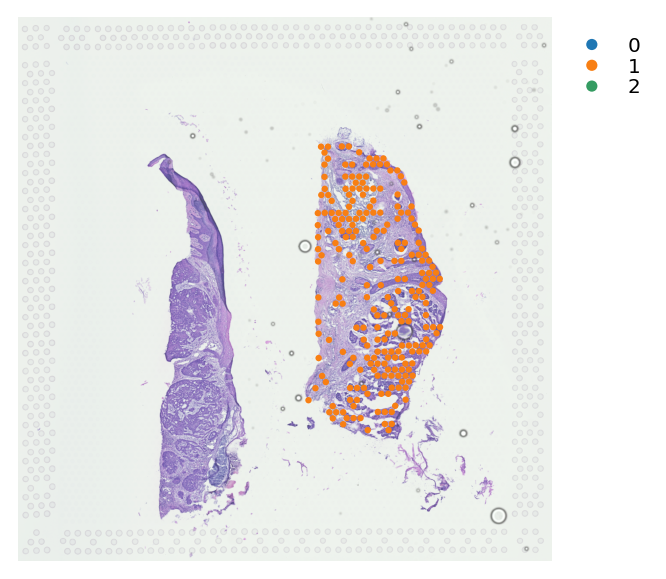

In [31]:
1/0
st.pl.cluster_plot(data_subset, list_cluster=[1], use_label='louvain',tissue_alpha=0.75)

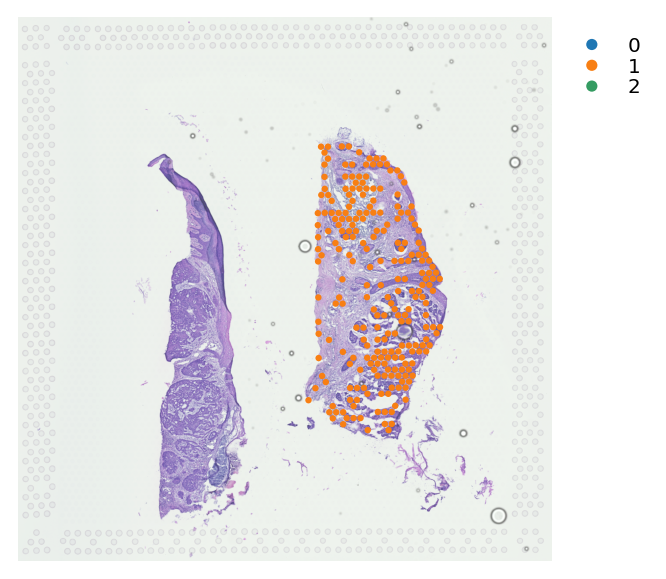

In [37]:
st.pl.cluster_plot(data_subset, list_cluster=[1], use_label='louvain',tissue_alpha=0.75)

In [38]:
print(type(data_subset.obs))
data_subset.obs.loc[data_subset.obs['louvain']=='1']

<class 'pandas.core.frame.DataFrame'>


imagerow     imagecol   tissue kmeans louvain
AAAGTTGACTCCCGTA-1  1073.146748  1385.370596  Tissue2      1       1
AAATAGCTTAGACTTT-1   939.617052  1512.027440  Tissue2      1       1
AAATCTAGCCCTGCTA-1  1317.623912  1451.153608  Tissue2      1       1
AACACACGCTCGCCGC-1  1273.441292  1348.060828  Tissue2      1       1
AACGGACGTACGTATA-1  1250.859064  1335.296960  Tissue2      0       1
...                         ...          ...      ...    ...     ...
TTGAATTCACGTGAGG-1  1006.381900  1398.134464  Tissue2      1       1
TTGACCATGTTCTCCG-1   674.521332  1153.657300  Tissue2      1       1
TTGAGAAGTTTAGCAT-1  1362.788368  1272.459456  Tissue2      1       1
TTGATGTGTAGTCCCG-1   673.539496  1306.823716  Tissue2      1       1
TTGTAAGGCCAGTTGG-1   741.286180  1191.948904  Tissue2      1       1

[235 rows x 5 columns]

In [40]:
data_subset.obs[['louvain']]

louvain
AAACAAGTATCTCCCA-1       0
AAACATTTCCCGGATT-1       0
AAACGAGACGGTTGAT-1       0
AAAGTGTGATTTATCT-1       2
AAAGTTGACTCCCGTA-1       1
...                    ...
TTGGCCTAGAATTTCG-1       0
TTGGGCGGCGGTTGCC-1       0
TTGTAAGGCCAGTTGG-1       1
TTGTGGTGGTACTAAG-1       2
TTGTTGTGTGTCAAGA-1       0

[676 rows x 1 columns]

In [44]:
morphology_tsv = data_subset.obs[['louvain']]
type(morphology_tsv)

pandas.core.frame.DataFrame

In [46]:
morphology_tsv.index

Index(['AAACAAGTATCTCCCA-1', 'AAACATTTCCCGGATT-1', 'AAACGAGACGGTTGAT-1',
       'AAAGTGTGATTTATCT-1', 'AAAGTTGACTCCCGTA-1', 'AAATAGCTTAGACTTT-1',
       'AAATAGGGTGCTATTG-1', 'AAATCTAGCCCTGCTA-1', 'AAATTACACGACTCTG-1',
       'AAATTACCTATCGATG-1',
       ...
       'TTGACGCTCCATGAGC-1', 'TTGACTATTGTCCGGC-1', 'TTGAGAAGTTTAGCAT-1',
       'TTGATGTGTAGTCCCG-1', 'TTGGACCTATAACAGT-1', 'TTGGCCTAGAATTTCG-1',
       'TTGGGCGGCGGTTGCC-1', 'TTGTAAGGCCAGTTGG-1', 'TTGTGGTGGTACTAAG-1',
       'TTGTTGTGTGTCAAGA-1'],
      dtype='object', length=676)

In [48]:
morphology_tsv.to_csv('morphology_clusters.tsv',sep='\t')

In [67]:
data_subset.obsm["label"]['max_type'] =  data_subset.obsm["label"].idxmax(axis=1)

data_subset.obsm["label"].head(15)

T cells  macrophages/dendritic  pericytes  \
AAACAAGTATCTCCCA-1  0.035814               0.257627   0.342138   
AAACATTTCCCGGATT-1  0.085743               0.259431   0.099209   
AAACGAGACGGTTGAT-1  0.909341               0.027789   0.016156   
AAAGTGTGATTTATCT-1  0.033954               0.413388   0.057825   
AAAGTTGACTCCCGTA-1  0.653707               0.113038   0.055600   
AAATAGCTTAGACTTT-1  0.197027               0.020129   0.000603   
AAATAGGGTGCTATTG-1  0.125689               0.070369   0.453649   
AAATCTAGCCCTGCTA-1  0.030901               0.229749   0.149359   
AAATTACACGACTCTG-1  0.078544               0.072474   0.022737   
AAATTACCTATCGATG-1  0.138477               0.176559   0.251234   
AACACACGCTCGCCGC-1  0.272955               0.232553   0.014050   
AACATATCAACTGGTG-1  0.091267               0.030261   0.150566   
AACCCTACTGTCAATA-1  0.072213               0.361199   0.057413   
AACCGCTAAGGGATGC-1  0.103606               0.095047   0.064373   
AACGATAATGCCGTAG-1  0.091868               0.017197   0.025337   

                    epidermal stem cell  vascular endothelial  \
AAACAAGTATCTCCCA-1             0.069735              0.000000   
AAACATTTCCCGGATT-1             0.258701              0.016428   
AAACGAGACGGTTGAT-1             0.034395              0.000294   
AAAGTGTGATTTATCT-1             0.070385              0.336872   
AAAGTTGACTCCCGTA-1             0.013064              0.058039   
AAATAGCTTAGACTTT-1             0.094709              0.056352   
AAATAGGGTGCTATTG-1             0.202278              0.015744   
AAATCTAGCCCTGCTA-1             0.206160              0.027757   
AAATTACACGACTCTG-1             0.768624              0.047400   
AAATTACCTATCGATG-1             0.022037              0.216560   
AACACACGCTCGCCGC-1             0.287870              0.035615   
AACATATCAACTGGTG-1             0.209618              0.147222   
AACCCTACTGTCAATA-1             0.322364              0.025670   
AACCGCTAAGGGATGC-1             0.688541              0.012211   
AACGATAATGCCGTAG-1             0.108118              0.754446   

                    differentiated keratinocytes  lymphatic endothelial cells  \
AAACAAGTATCTCCCA-1                      0.267674                     0.027012   
AAACATTTCCCGGATT-1                      0.275348                     0.005141   
AAACGAGACGGTTGAT-1                      0.011885                     0.000140   
AAAGTGTGATTTATCT-1                      0.006954                     0.035127   
AAAGTTGACTCCCGTA-1                      0.023689                     0.073247   
AAATAGCTTAGACTTT-1                      0.147088                     0.000000   
AAATAGGGTGCTATTG-1                      0.104023                     0.000000   
AAATCTAGCCCTGCTA-1                      0.294286                     0.002649   
AAATTACACGACTCTG-1                      0.000000                     0.000000   
AAATTACCTATCGATG-1                      0.095241                     0.099892   
AACACACGCTCGCCGC-1                      0.000000                     0.003426   
AACATATCAACTGGTG-1                      0.369559                     0.000000   
AACCCTACTGTCAATA-1                      0.161141                     0.000000   
AACCGCTAAGGGATGC-1                      0.036222                     0.000000   
AACGATAATGCCGTAG-1                      0.003034                     0.000000   

                    melanocytes  erythrocytes                      max_type  
AAACAAGTATCTCCCA-1     0.000000      0.000000                     pericytes  
AAACATTTCCCGGATT-1     0.000000      0.000000  differentiated keratinocytes  
AAACGAGACGGTTGAT-1     0.000000      0.000000                       T cells  
AAAGTGTGATTTATCT-1     0.042808      0.002686         macrophages/dendritic  
AAAGTTGACTCCCGTA-1     0.009616      0.000000                       T cells  
AAATAGCTTAGACTTT-1     0.000000      0.484092                  erythrocytes  
AAATAGGGTGCTATTG-1     0.000000      0.028248                     pericytes  
AA

In [35]:
# data_subset.obsm["label"].head(15)

In [56]:
data_subset.obsm['filtered_counts']

FAM41C  AL645608.1  SAMD11  NOC2L  KLHL17  PLEKHN1  \
AAACAAGTATCTCCCA-1     0.0         0.0     0.0    0.0     0.0      0.0   
AAACATTTCCCGGATT-1     0.0         0.0     0.0    1.0     1.0      0.0   
AAACGAGACGGTTGAT-1     0.0         0.0     0.0    0.0     0.0      0.0   
AAAGTGTGATTTATCT-1     0.0         0.0     0.0    1.0     0.0      0.0   
AAAGTTGACTCCCGTA-1     0.0         0.0     0.0    0.0     0.0      0.0   
...                    ...         ...     ...    ...     ...      ...   
TTGGCCTAGAATTTCG-1     0.0         0.0     0.0    0.0     1.0      0.0   
TTGGGCGGCGGTTGCC-1     0.0         0.0     0.0    0.0     0.0      0.0   
TTGTAAGGCCAGTTGG-1     0.0         0.0     0.0    0.0     0.0      0.0   
TTGTGGTGGTACTAAG-1     0.0         0.0     0.0    0.0     0.0      0.0   
TTGTTGTGTGTCAAGA-1     0.0         0.0     0.0    0.0     0.0      0.0   

                    AL645608.8  HES4  ISG15  AGRN  ...  MT-ATP6  MT-CO3  \
AAACAAGTATCTCCCA-1         0.0   0.0    0.0   0.0  ...     11.0    14.0   
AAACATTTCCCGGATT-1         0.0   0.0    0.0   0.0  ...     10.0     9.0   
AAACGAGACGGTTGAT-1         0.0   1.0    0.0   0.0  ...      2.0    11.0   
AAAGTGTGATTTATCT-1         0.0   0.0    1.0   2.0  ...     20.0    15.0   
AAAGTTGACTCCCGTA-1         0.0   0.0    0.0   0.0  ...      4.0     1.0   
...                        ...   ...    ...   ...  ...      ...     ...   
TTGGCCTAGAATTTCG-1         0.0   0.0    0.0   0.0  ...     14.0    18.0   
TTGGGCGGCGGTTGCC-1         1.0   0.0    0.0   1.0  ...      8.0    14.0   
TTGTAAGGCCAGTTGG-1         0.0   0.0    0.0   0.0  ...      1.0     7.0   
TTGTGGTGGTACTAAG-1         0.0   1.0    0.0   1.0  ...     21.0    26.0   
TTGTTGTGTGTCAAGA-1         0.0   0.0    0.0   0.0  ...     12.0    10.0   

                    MT-ND3  MT-ND4L  MT-ND4  MT-ND5  MT-ND6  MT-CYB  \
AAACAAGTATCTCCCA-1     7.0      0.0     3.0     0.0     0.0     6.0   
AAACATTTCCCGGATT-1     7.0      1.0     3.0     0.0     0.0     3.0   
AAACGAGACGGTTGAT-1     5.0      1.0     1.0     0.0     0.0     2.0   
AAAGTGTGATTTATCT-1     7.0      0.0     7.0     1.0     0.0     7.0   
AAAGTTGACTCCCGTA-1     0.0      0.0     1.0     0.0     0.0     0.0   
...                    ...      ...     ...     ...     ...     ...   
TTGGCCTAGAATTTCG-1     9.0      0.0     5.0     1.0     0.0     4.0   
TTGGGCGGCGGTTGCC-1     7.0      0.0     5.0     0.0     0.0     4.0   
TTGTAAGGCCAGTTGG-1     4.0      0.0     1.0     0.0     0.0     2.0   
TTGTGGTGGTACTAAG-1    11.0      0.0    13.0     2.0     0.0    10.0   
TTGTTGTGTGTCAAGA-1     7.0      1.0     7.0     1.0     0.0     2.0   

                    AC145212.1  AC007325.4  
AAACAAGTATCTCCCA-1         0.0         0.0  
AAACATTTCCCGGATT-1         0.0         0.0  
AAACGAGACGGTTGAT-1         0.0         0.0  
AAAGTGTGATTTATCT-1         0.0         0.0  
AAAGTTGACTCCCGTA-1         0.0         0.0  
...                        ...         ...  
TTGGCCTAGAATTTCG-1         0.0         0.0  
TTGGGCGGCGGTTGCC-1         0.0         0.0  
TTGTAAGGCCAGTTGG-1         0.0         0.0  
TTGTGGTGGTACTAAG-1         0.0         0.0  
TTGTTGTGTGTCAAGA-1         0.0         0.0  

[676 rows x 14595 columns]

In [28]:
gene_names_df = pd.DataFrame(data_subset.obsm['filtered_counts'].columns)
gene_names_df.to_csv('biomart_input.csv', index=False)

In [68]:
# cluster_1_bc = data_subset.obsm["label"][0]
cluster_1_bc = data_subset.obsm["label"].index.tolist()
cluster1_genes = data_subset.obsm['filtered_counts'].loc[cluster_1_bc]

In [71]:
cluster_1_bc

['AAACAAGTATCTCCCA-1',
 'AAACATTTCCCGGATT-1',
 'AAACGAGACGGTTGAT-1',
 'AAAGTGTGATTTATCT-1',
 'AAAGTTGACTCCCGTA-1',
 'AAATAGCTTAGACTTT-1',
 'AAATAGGGTGCTATTG-1',
 'AAATCTAGCCCTGCTA-1',
 'AAATTACACGACTCTG-1',
 'AAATTACCTATCGATG-1',
 'AACACACGCTCGCCGC-1',
 'AACATATCAACTGGTG-1',
 'AACCCTACTGTCAATA-1',
 'AACCGCTAAGGGATGC-1',
 'AACGATAATGCCGTAG-1',
 'AACGATATGTCAACTG-1',
 'AACGCTGTTGCTGAAA-1',
 'AACGGACGTACGTATA-1',
 'AACTCCAGAGCGTGTT-1',
 'AACTCTCAATAGAGCG-1',
 'AAGAGCTCTTTATCGG-1',
 'AAGAGGCATGGATCGC-1',
 'AAGATTGGCGGAACGT-1',
 'AAGCTCTTTCATGGTG-1',
 'AAGGATCGATCGCTTG-1',
 'AAGGATGAGGGACCTC-1',
 'AAGGGACAGATTCTGT-1',
 'AAGTCAATTGTCGTCA-1',
 'AAGTGCCTTGACTGTA-1',
 'AAGTGTTTGGAGACGG-1',
 'AAGTTCACTCCAAGCT-1',
 'AATAGAATCTGTTTCA-1',
 'AATATCGAGGGTTCTC-1',
 'AATCATGTAAAGACTC-1',
 'AATCGCCTCAGCGCCA-1',
 'AATCTGCGTTGGGACG-1',
 'AATGACGTAGGATGTC-1',
 'AATGATGATACGCTAT-1',
 'AATGATGCGACTCCTG-1',
 'AATGCACCAAGCAATG-1',
 'AATTCATAAGGGATCT-1',
 'AATTGAACGCTCTGGT-1',
 'ACAAATCGCACCGAAT-1',
 'ACAAATGGT

In [69]:
data_subset.obs_names

Index(['AAACAAGTATCTCCCA-1', 'AAACATTTCCCGGATT-1', 'AAACGAGACGGTTGAT-1',
       'AAAGTGTGATTTATCT-1', 'AAAGTTGACTCCCGTA-1', 'AAATAGCTTAGACTTT-1',
       'AAATAGGGTGCTATTG-1', 'AAATCTAGCCCTGCTA-1', 'AAATTACACGACTCTG-1',
       'AAATTACCTATCGATG-1',
       ...
       'TTGACGCTCCATGAGC-1', 'TTGACTATTGTCCGGC-1', 'TTGAGAAGTTTAGCAT-1',
       'TTGATGTGTAGTCCCG-1', 'TTGGACCTATAACAGT-1', 'TTGGCCTAGAATTTCG-1',
       'TTGGGCGGCGGTTGCC-1', 'TTGTAAGGCCAGTTGG-1', 'TTGTGGTGGTACTAAG-1',
       'TTGTTGTGTGTCAAGA-1'],
      dtype='object', length=676)

In [61]:
st.pp.filter_genes(data_subset,min_cells=0.01*data_subset.n_vars)
st.pp.normalize_total(data_subset)
data_subset.obsm['normalized'] = pd.DataFrame(data_subset.X.toarray(), 
                                              index=data_subset.obs_names, 
                                              columns=data_subset.var_names)


filtered out 12868 genes that are detected in less than 145.95000000000002 cells
normalizing counts per cell
Normalization step is finished in adata.X


In [64]:
st.tl.SpatialDE(data_subset, use_data='normalized', top_genes=10)


AttributeError: module 'stlearn.tl' has no attribute 'SpatialDE'

### CCI analysis

In [15]:
st.pp.filter_genes(data_subset,min_cells=5)
st.pp.normalize_total(data_subset)
data_subset.obsm['normalized'] = pd.DataFrame(data_subset.X.toarray(), 
                                              index=data_subset.obs_names, 
                                              columns=data_subset.var_names)
st.pp.log1p(data_subset)
st.pp.scale(data_subset)
st.em.run_pca(data_subset,n_comps=50)
# st.em.run_umap(data_subset)

Normalization step is finished in adata.X


AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [12]:
# plt.ion()
# plt.show()
# st.pp.neighbors(data_subset,n_neighbors=15)
st.tl.clustering.kmeans(data_subset,n_clusters=3,use_data="X_umap_disk")
st.pp.neighbors(data_subset,n_neighbors=20,use_rep='X_umap_disk')
# st.em.run_umap(data_subset)
# st.spatial.smooth.disk(data_subset,rates=2,method="median",use_data="X_umap")
st.tl.clustering.louvain(data_subset, resolution=0.1)
st.pl.cluster_plot(data_subset,use_label="louvain")

KeyError: 'X_umap_disk'

In [18]:
st.pp.tiling(data_subset,out_path="./temp_tiling",crop_size=40)
st.pp.extract_feature(data_subset)
st.spatial.morphology.adjust(data_subset,use_data='X_pca',radius=50,method="mean")
st.pp.neighbors(data_subset,n_neighbors=25,use_rep='X_pca_morphology')

Tiling image: 100%|██████████ [ time left: 00:00 ]
Extract feature: 100%|██████████ [ time left: 00:00 ]


The morphology feature is added to adata.obsm['X_morphology']!


Adjusting data: 100%|██████████ [ time left: 00:00 ]


The data adjusted by morphology is added to adata.obsm['X_pca_morphology']
Created k-Nearest-Neighbor graph in adata.uns['neighbors'] 


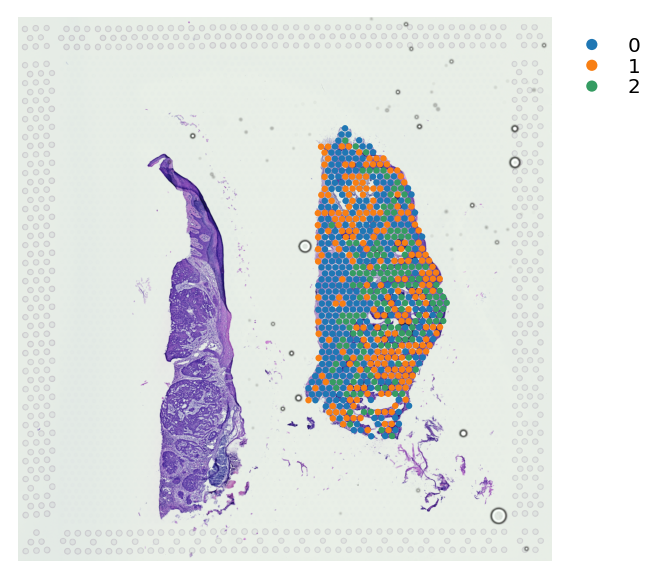

In [49]:
# st.tl.clustering.louvain(data_subset, resolution=0.9)
st.pl.cluster_plot(data_subset,use_label="louvain")


In [50]:
counts = st.tl.cci.het.count(data_subset, use_clustering='louvain', num=40)

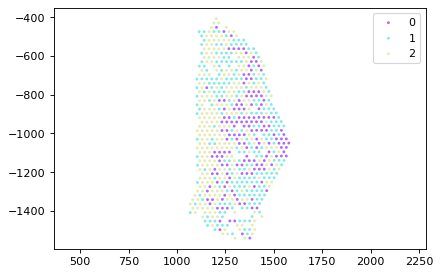

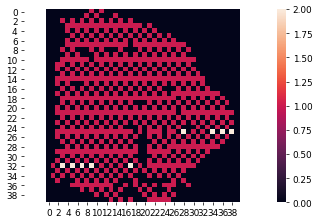

In [51]:
plt.ion()
st.pl.het_plot(data_subset, use_cluster='louvain', het=counts, dpi=80)
plt.show()

In [53]:
# data_subset.obs
data_subset.obsm['label']['max_type']

KeyError: 'label'

In [52]:
data_subset.obs['prediction'] = data_subset.obsm["label"]['max_type']

KeyError: 'label'

In [21]:
# data_subset.obsm

AxisArrays with keys: filtered_counts, normalized, X_pca, X_tile_feature, X_morphology, X_pca_morphology

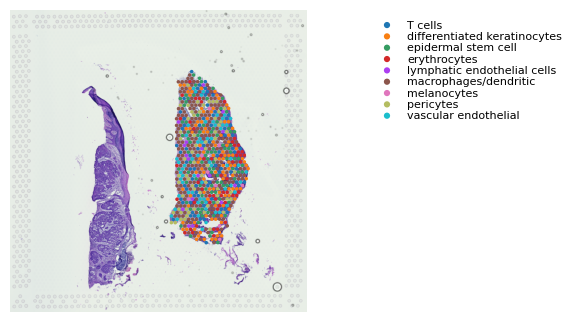

In [84]:

st.pl.cluster_plot(data_subset,use_label="prediction", dpi=100, name='label_transfer', output='.')

In [94]:

counts = st.tl.cci.het.count(data_subset, use_clustering='prediction', 
                             use_clusters=['T cells', 'differentiated keratinocytes'], num=40)
st.pl.het_plot(data_subset, use_cluster='prediction', het=counts, dpi=100)

In [95]:
??st.pl.het_plot

In [91]:
st.add.lr(data_subset)
st.tl.cci.base.lr(adata=data_subset, use_data='normalized', threshold=1, distance=30)

KeyError: 'cpdb'

In [96]:
import scanpy as sc
from anndata import AnnData
rank_test = AnnData(data_subset.obsm['lr_neighbours'])
rank_test.obs['lr_neighbours_louvain'] = data_subset.obs['lr_neighbours_louvain']
sc.tl.rank_genes_groups(rank_test, 'lr_neighbours_louvain', method='t-test')
pd.DataFrame(rank_test.uns['rank_genes_groups']['names']).iloc[0:15,]

KeyError: 'lr_neighbours'